C:\Users\miesz\AppData\Local\Temp\ipykernel_18440\3397765026.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


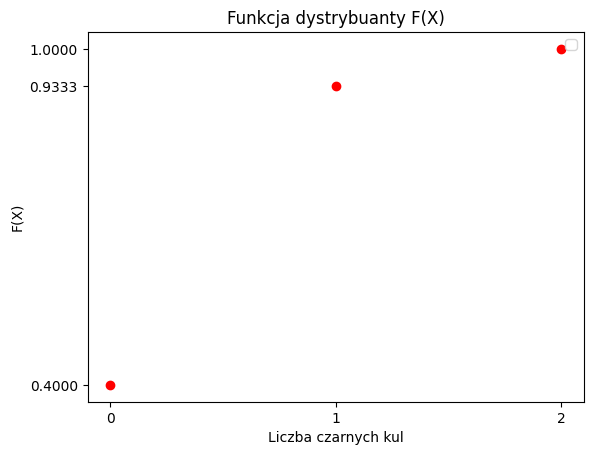

a) Funkcja prawdopodobieństwa P(X): {0: 0.4, 1: 0.5333333333333333, 2: 0.06666666666666667}
b) Wartość oczekiwana E(X):  0.6666666666666666
Wariancja D(X): 0.3555555555555556
c) Prawdopodobieństwo wylosowania co najmniej jednej czarnej kuli: 0.9333333333333333
c) Prawdopodobieństwo wylosowania co najmniej jednej białej kuli: 0.9333333333333333
d) Funkcja dystrybuanty F(X): {0: 0.4, 1: 0.9333333333333333, 2: 1.0}


In [25]:
# Zadanie 1

from math import comb
import matplotlib.pyplot as plt

# ilość kul w urnie
czarne = 2
biale = 4
wszystkie = czarne + biale

# a)
# prawdopodobieństwa dla każdej wartości X
P_X = {
    0: comb(biale, 2) / comb(wszystkie, 2),   # Wylosowanie 0 czarnych kul (2 białe)
    1: comb(czarne, 1) * comb(biale, 1) / comb(wszystkie, 2),  # Wylosowanie 1 czarnej i 1 białej kuli
    2: comb(czarne, 2) / comb(wszystkie, 2)    # Wylosowanie 2 czarnych kul
}

P_X

# b)
# wartość oczekiwania E(X)
E_X = sum(x * p for x, p in P_X.items())

# E(X^2)
E_X2 = sum(x**2 * p for x, p in P_X.items())

# wariancja D(X)
D_X = E_X2 - E_X**2

E_X, D_X

# c)
# prawdopodobieństwo wylosowania co najmniej jednej czarnej kuli
P_X_at_least_one_black = P_X[0] + P_X[1]

# prawdopodobieństwo wylosowania co najmniej jednej białej kuli
P_at_least_one_white = 1 - P_X[2]

P_X_at_least_one_black, P_at_least_one_white

# obliczenie wartości dystrybuanty F(X)
F_X = {}
accumulated_probability = 0
for x in sorted(P_X.keys()):
    accumulated_probability += P_X[x]
    F_X[x] = accumulated_probability

# dane od wykresu
F_X_values = [0.4, 0.9333333333333333, 1.0]
X_values = [0, 1, 2]

plt.scatter(X_values, F_X_values, color='red')
plt.xticks(X_values)
plt.yticks(F_X_values)
plt.xlabel('Liczba czarnych kul')
plt.ylabel('F(X)')
plt.title('Funkcja dystrybuanty F(X)')
plt.legend()
plt.show()

print("a) Funkcja prawdopodobieństwa P(X):", P_X)
print("b) Wartość oczekiwana E(X): ", E_X)
print("Wariancja D(X):", D_X)
print("c) Prawdopodobieństwo wylosowania co najmniej jednej czarnej kuli:", P_X_at_least_one_black)
print("c) Prawdopodobieństwo wylosowania co najmniej jednej białej kuli:", P_at_least_one_white)
print("d) Funkcja dystrybuanty F(X):", F_X)

C:\Users\miesz\AppData\Local\Temp\ipykernel_18440\1102897240.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


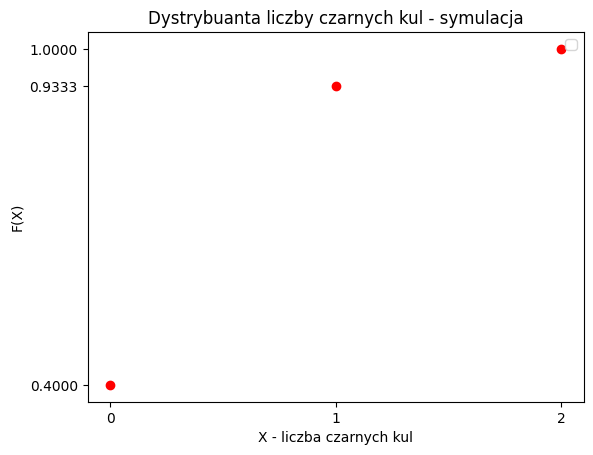

({0: 0.4, 1: 0.5333333333333333, 2: 0.06666666666666667},
 0.6666666666666666,
 0.3555555555555556,
 0.9333333333333333,
 {0: 0.4, 1: 0.9333333333333333, 2: 1.0})

In [31]:
# Zadanie 2

from math import comb, floor
import matplotlib.pyplot as plt

def simulate_ball_drawing(B, C, N):
    total_balls = B + C
    max_black_balls = min(C, N)
    
    P_X = {}
    for x in range(max_black_balls + 1):
        if x <= C and (N - x) <= B:
            P_X[x] = comb(C, x) * comb(B, N - x) / comb(total_balls, N)
    
    E_X = sum(x * prob for x, prob in P_X.items())
    E_X2 = sum(x**2 * prob for x, prob in P_X.items())
    D_X = E_X2 - E_X**2
    
    # P(X) <= floor(N/2)
    max_half_black = floor(N / 2)
    P_X_leq_half = sum(prob for x, prob in P_X.items() if x <= max_half_black)
    
    F_X = {}
    accumulated_probability = 0
    for x in sorted(P_X.keys()):
        accumulated_probability += P_X[x]
        F_X[x] = accumulated_probability
    
    X_values = sorted(F_X.keys())
    F_values = [F_X[x] for x in X_values]
    plt.scatter(X_values, F_values, color='red')
    plt.xticks(X_values)
    plt.yticks(F_values)
    plt.xlabel('X - liczba czarnych kul')
    plt.ylabel('F(X)')
    plt.title('Dystrybuanta liczby czarnych kul - symulacja')
    plt.legend()
    plt.show()
    
    return P_X, E_X, D_X, P_X_leq_half, F_X

B, C, N = 4, 2, 2
simulate_ball_drawing(B, C, N)

1 0.125
2 0.234375
3 0.330078125
4 0.413818359375
5 0.487091064453125
6 0.5512046813964844
7 0.6073040962219238
8 0.6563910841941833
9 0.6993421986699104
10 0.7369244238361716
11 0.7698088708566502
12 0.7985827619995689
13 0.8237599167496228
14 0.8457899271559199
15 0.86506618626143
16 0.8819329129787512
17 0.8966912988564073
18 0.9096048864993564
19 0.9209042756869368
20 0.9307912412260697
21 0.939442336072811
22 0.9470120440637096
23 0.9536355385557459
24 0.9594310962362776
25 0.964502209206743
26 0.9689394330559001
27 0.9728220039239126
28 0.9762192534334235
29 0.9791918467542455
30 0.9817928659099648
31 0.9840687576712193
32 0.9860601629623169
33 0.9878026425920272
34 0.9893273122680238
35 0.9906613982345208
Liczba rzutów przekraczająca prawdopodobieństwo: 0.99 35


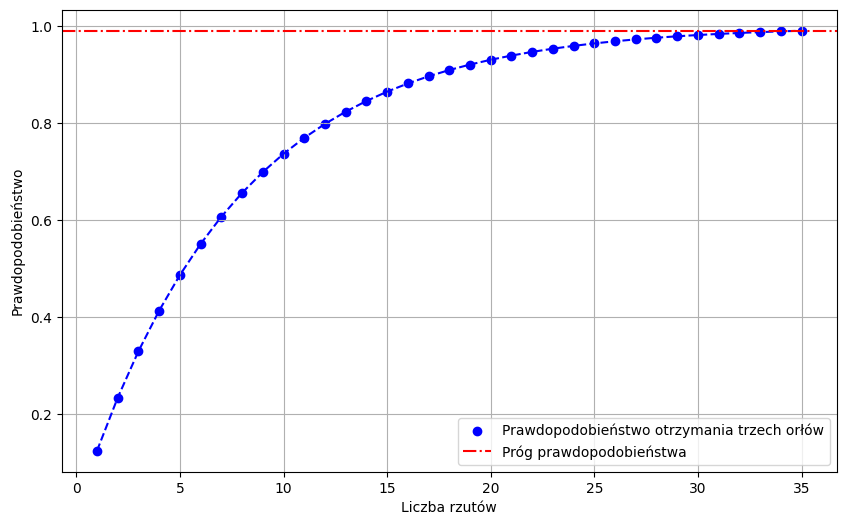

In [37]:
# Zadanie 3

import matplotlib.pyplot as plt
import numpy as np

# prawdopodobieństwo progowe
probability_threshold = 0.99
# prawdopodobieństwo startowe
current_probability = 0
# liczba rzutów
number_of_throws = 0

# listy do danych z wykresu
attempts = []
probabilities = []


while current_probability <= probability_threshold:
    number_of_throws += 1
    current_probability = 1 - ((7 / 8) ** number_of_throws)  # prawdopodobieństwo porażki w n-rzutach
    attempts.append(number_of_throws)
    probabilities.append(current_probability)
    print(number_of_throws, current_probability)

print("Liczba rzutów przekraczająca prawdopodobieństwo:", probability_threshold, number_of_throws)


plt.figure(figsize=(10, 6))
plt.scatter(attempts, probabilities, color='blue', label='Prawdopodobieństwo otrzymania trzech orłów')
plt.plot(attempts, probabilities, 'b--')
plt.axhline(y=probability_threshold, color='red', linestyle='-.', label='Próg prawdopodobieństwa')
plt.xlabel('Liczba rzutów')
plt.ylabel('Prawdopodobieństwo')
plt.legend()
plt.grid(True)
plt.show()

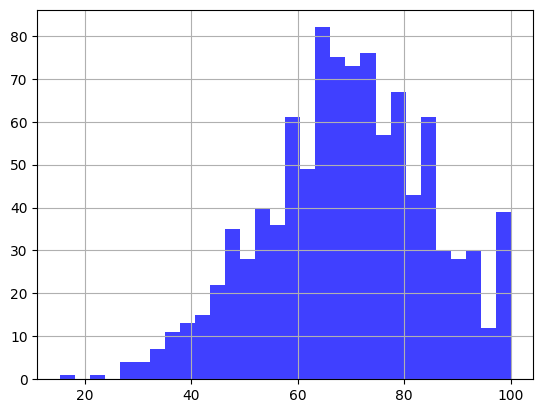

Liczba studentów, którzy zaliczyli egzamin 878
Prawdopodobieństwo zdania egzaminu: 0.9087887802741321
Prawdopodobieństwo otrzymania co najwyżej 40 punktów: 0.0227501319481792
Prawdopodobieństwo otrzymania między 60 a 75 punktami 0.3780661222713134
Prawdopodobieństwo otrzymania więcej niż 70 punktów 0.5


In [46]:
# Zadanie 5

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

A = 70
B = 15
N = 1000 

scores = np.random.normal(A, B, N)
scores = np.clip(scores, 0, 100) 

plt.hist(scores, bins=30, alpha=0.75, color='blue')
plt.title('Histogram wyników egzaminów')
plt.xlabel('Wynik')
plt.ylabel('Liczba studentów')
plt.grid(True)
plt.show()


passed_students = np.sum(scores >= 50)
print("Liczba studentów, którzy zaliczyli egzamin", passed_students)

# a) 
prob_pass = 1 - norm.cdf(50, A, B)

# b) 
prob_less_than_40 = norm.cdf(40, A, B)

# c) 
prob_between_60_and_75 = norm.cdf(75, A, B) - norm.cdf(60, A, B)

# d) 
prob_more_than_70 = 1 - norm.cdf(70, A, B)

print("Prawdopodobieństwo zdania egzaminu:", prob_pass)
print("Prawdopodobieństwo otrzymania co najwyżej 40 punktów:", prob_less_than_40)
print("Prawdopodobieństwo otrzymania między 60 a 75 punktami", prob_between_60_and_75)
print("Prawdopodobieństwo otrzymania więcej niż 70 punktów", prob_more_than_70)